In [10]:
# TOP)C


https://code.visualstudio.com/docs/python/data-science-tutorial


Tatanic Analysis:
Aug 15, 2020

SyntaxError: invalid syntax (<ipython-input-10-5531242f5c5d>, line 5)

In [31]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [32]:
data.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [9]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [33]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [35]:
## 轉置性別。目前 Gender 為 String 
data.replace({'male': 1, 'female': 0}, inplace=True)


In [36]:
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
# 計算存活率
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [38]:
# Calculate whether the Parents & Childrens are the key metrics
data['relatives_in_mind'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives_in_mind,0.201719


In [39]:
data = data[['sex', 'pclass','age','relatives_in_mind','fare','survived']].dropna()


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives_in_mind','fare']]
, data.survived
, test_size=0.2
, random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
## 分 Traning Sets / Test Set
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [42]:
from sklearn.naive_bayes import GaussianNB
## Choose a better Algo to 
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
from sklearn import metrics

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885



# Use a neural network to increase accuracy 


A neural network is a model that uses **weights and activation functions**, *modeling* aspects of human neurons, to determine an outcome based on provided inputs.

In [44]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))



**The rectified linear unit (relu) activation function** is used as a good general activation function for the first two layers, while the sigmoid activation function is required for the final layer as the output you want (of whether a passenger survives or not) needs to be scaled in the range of 0-1 (the probability of a passenger surviving).

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
836/836 [==============================] - 1s 713us/step - loss: 0.6923 - accuracy: 0.5778
Epoch 2/50
836/836 [==============================] - 0s 52us/step - loss: 0.6898 - accuracy: 0.5897
Epoch 3/50
836/836 [==============================] - 0s 75us/step - loss: 0.6851 - accuracy: 0.6543
Epoch 4/50
836/836 [==============================] - 0s 71us/step - loss: 0.6757 - accuracy: 0.7572
Epoch 5/50
836/836 [==============================] - 0s 60us/step - loss: 0.6601 - accuracy: 0.7727
Epoch 6/50
836/836 [==============================] - 0s 56us/step - loss: 0.6405 - accuracy: 0.7739
Epoch 7/50
836/836 [==============================] - 0s 68us/step - loss: 0.6179 - accuracy: 0.7715
Epoch 8/50
836/836 [==============================] - 0s 56us/step - loss: 0.5958 - accuracy: 0.7667
Epoch 9/50
836/836 [==============================] - 0s 52us/step - loss: 0.5766 - accuracy: 0.7691
Epoch 10/50
836/836 [==============================] - 0s 56us/step - loss: 0.5593 - accur

### With the model built and trained its now time to see how it performs against the test data.

In [47]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7990430622009569


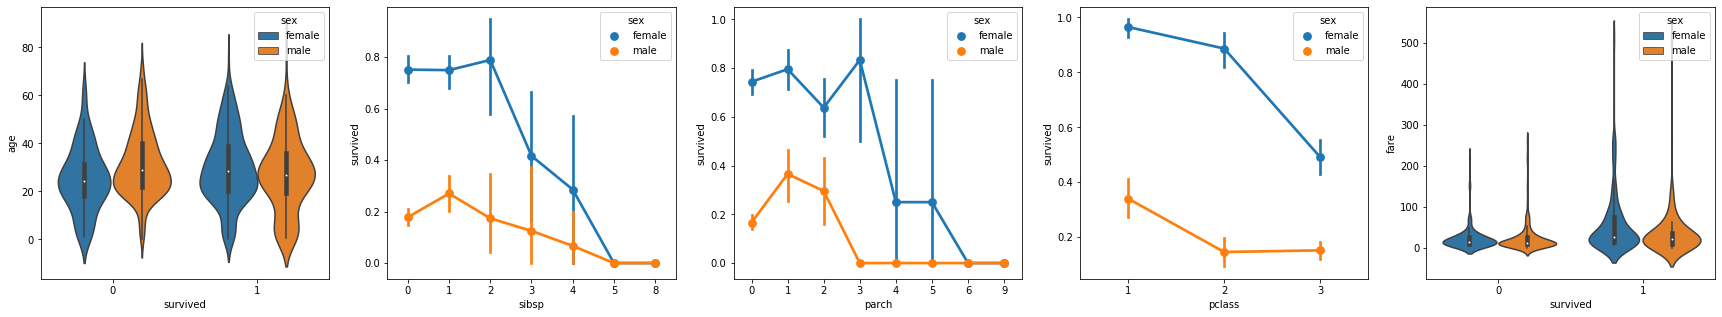

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])